In [1]:

from datetime import datetime

import torch
from torch.utils.data import DataLoader

from datasets.CSVDataset import CSVDataset
from models.mlp import MLPBinaryClassifier
from train import train_classifier
from utils import plot_model_metrics
from utils import reduce_dataset, split_dataset, undersample_dataset

device = torch.device('cuda:0' if  torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

batch_size = 256
dataset = CSVDataset("data/features/Resnet50Model_features.csv")
dataset = reduce_dataset(dataset, discard_ratio=0.0)
train_dataset, test_dataset = split_dataset(dataset, train_ratio=0.8)
# train_dataset = undersample_dataset(train_dataset)

train_loader = DataLoader(train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(test_dataset,
                         batch_size=batch_size,
                         shuffle=True, )

model = MLPBinaryClassifier(in_features=2048, hidden_layers=1, units_per_layer=2048,
                            dropout=0.3, focal_alpha=0.9, focal_gamma=2.0)

print(f"Dataset: {len(train_dataset):,} training, {len(test_dataset):,} testing")


Device: cuda:0
data/features/Resnet50Model_features.pickle
Dataset: 16,181 training, 4,046 testing


In [2]:
print(model)

MLPBinaryClassifier(
  (model): Sequential(
    (0): Linear(in_features=2048, out_features=2048, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=2048, out_features=2048, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=2048, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [3]:
print(f"Training starts {datetime.now().isoformat()}")

Training starts 2025-01-30T15:51:59.134933


In [4]:

model = model.to(device)
model, model_metrics = train_classifier(model, train_loader, test_loader, device,
                                        start_learning_rate=0.000075,
                                        max_epochs=20,
                                        checkpoint_every=1,
                                        eval_every=1)

Epoch 1 training: 100%|██████████| 64/64 [00:00<00:00, 140.27it/s]


Train: 1/20: lr: 0.000075000000 loss:0.02244462538510561


Epoch 1 testing: 100%|██████████| 16/16 [00:00<00:00, 128.00it/s]


Test: 1/20: loss:0.01884241448715329, accuracy:0.8137183328276699, precision:0.17281729970785192, recall:0.6034103355794532, f1:0.2680688956746071, mcc:0.2490670858351705, ece:0.18628166802227497, epoch:0


Epoch 2 training: 100%|██████████| 64/64 [00:00<00:00, 209.11it/s]


Train: 2/20: lr: 0.000075000000 loss:0.015516896353801712


Epoch 2 testing: 100%|██████████| 16/16 [00:00<00:00, 227.25it/s]


Test: 2/20: loss:0.01531873969361186, accuracy:0.8136140397451457, precision:0.20502474717679503, recall:0.7929776900945632, f1:0.3234990170057095, mcc:0.33791536277087775, ece:0.18638596031814814, epoch:1


Epoch 3 training: 100%|██████████| 64/64 [00:00<00:00, 189.33it/s]


Train: 3/20: lr: 0.000075000000 loss:0.011672030974295922


Epoch 3 testing: 100%|██████████| 16/16 [00:00<00:00, 255.99it/s]


Test: 3/20: loss:0.014701491454616189, accuracy:0.8817671988774272, precision:0.26826815887748945, recall:0.6256693940117853, f1:0.3708400274598732, mcc:0.3545209145476188, ece:0.11823280155658722, epoch:2


Epoch 4 training: 100%|██████████| 64/64 [00:00<00:00, 161.84it/s]


Train: 4/20: lr: 0.000075000000 loss:0.008915739570511505


Epoch 4 testing: 100%|██████████| 16/16 [00:00<00:00, 170.67it/s]


Test: 4/20: loss:0.016597494657617062, accuracy:0.9148897337682038, precision:0.3516864565011781, recall:0.5377222343360114, f1:0.4180840341844181, mcc:0.3886943098193603, ece:0.08511026669293642, epoch:3


Epoch 5 training: 100%|██████████| 64/64 [00:00<00:00, 142.23it/s]


Train: 5/20: lr: 0.000075000000 loss:0.006477165599790169


Epoch 5 testing: 100%|██████████| 16/16 [00:00<00:00, 170.66it/s]


Test: 5/20: loss:0.013426460674963892, accuracy:0.865284151243932, precision:0.2676059371758136, recall:0.7964704378868466, f1:0.3956147548185691, mcc:0.4079496362913228, ece:0.13471584860235453, epoch:4


Epoch 6 training: 100%|██████████| 64/64 [00:00<00:00, 122.93it/s]


Train: 6/20: lr: 0.000075000000 loss:0.004943468527926598


Epoch 6 testing: 100%|██████████| 16/16 [00:00<00:00, 146.30it/s]


Test: 6/20: loss:0.01755047292681411, accuracy:0.926734109526699, precision:0.40366201817250913, recall:0.5877466130683042, f1:0.4733494402650462, mcc:0.4475964474491748, ece:0.07326589059084654, epoch:5


Epoch 7 training: 100%|██████████| 64/64 [00:00<00:00, 102.71it/s]


Train: 7/20: lr: 0.000075000000 loss:0.003635369072071626


Epoch 7 testing: 100%|██████████| 16/16 [00:00<00:00, 124.04it/s]


Test: 7/20: loss:0.022131246922072023, accuracy:0.9421600045509708, precision:0.5032529033036967, recall:0.526999067592624, f1:0.5008372607479253, mcc:0.4783251730018959, ece:0.05783999525010586, epoch:6


Epoch 8 training: 100%|██████████| 64/64 [00:00<00:00, 101.55it/s]


Train: 8/20: lr: 0.000075000000 loss:0.00246293967074962


Epoch 8 testing: 100%|██████████| 16/16 [00:00<00:00, 113.79it/s]


Test: 8/20: loss:0.03784719301620498, accuracy:0.950830552184466, precision:0.6472222222222223, recall:0.26768873192296183, f1:0.3647164741620387, mcc:0.38843401433102964, ece:0.04916944773867726, epoch:7


Epoch 9 training: 100%|██████████| 64/64 [00:00<00:00, 96.71it/s] 


Train: 9/20: lr: 0.000075000000 loss:0.0019065198193857213


Epoch 9 testing: 100%|██████████| 16/16 [00:00<00:00, 102.39it/s]


Test: 9/20: loss:0.031041987182106823, accuracy:0.9500839085254854, precision:0.5807879314313138, recall:0.4149922872857277, f1:0.4759168787564739, mcc:0.4619702566014133, ece:0.04991609137505293, epoch:8


Epoch 10 training: 100%|██████████| 64/64 [00:00<00:00, 81.25it/s]


Train: 10/20: lr: 0.000075000000 loss:0.001058856580129941


Epoch 10 testing: 100%|██████████| 16/16 [00:00<00:00, 98.86it/s]

Test: 10/20: loss:0.02233550971141085, accuracy:0.9434992225424758, precision:0.5024785357723631, recall:0.6047345251889942, f1:0.5428894249718363, mcc:0.5189441813561484, ece:0.05650077678728849, epoch:9



Epoch 11 training: 100%|██████████| 64/64 [00:00<00:00, 82.14it/s]


Train: 11/20: lr: 0.000075000000 loss:0.0007397814479190856


Epoch 11 testing: 100%|██████████| 16/16 [00:00<00:00, 85.33it/s]


Test: 11/20: loss:0.02905327989719808, accuracy:0.9494178549757282, precision:0.5725959669845119, recall:0.5202490534920876, f1:0.5317820354553091, mcc:0.513045737353159, ece:0.05058214487507939, epoch:10


Epoch 12 training: 100%|██████████| 64/64 [00:00<00:00, 69.67it/s]


Train: 12/20: lr: 0.000075000000 loss:0.000489669256239722


Epoch 12 testing: 100%|██████████| 16/16 [00:00<00:00, 80.04it/s]


Test: 12/20: loss:0.02667439734796062, accuracy:0.9471020744842233, precision:0.5262606513283759, recall:0.5775579455266955, f1:0.5450288693336982, mcc:0.520924921471512, ece:0.05289792432449758, epoch:11


Epoch 13 training: 100%|██████████| 64/64 [00:00<00:00, 66.53it/s]


Train: 13/20: lr: 0.000075000000 loss:0.0003441476037551183


Epoch 13 testing: 100%|██████████| 16/16 [00:00<00:00, 78.77it/s]


Test: 13/20: loss:0.03185403815587051, accuracy:0.951318833434466, precision:0.5682040998217468, recall:0.5315818528521702, f1:0.541825683650996, mcc:0.5206277007212823, ece:0.04868116648867726, epoch:12


Epoch 14 training: 100%|██████████| 64/64 [00:01<00:00, 62.02it/s]


Train: 14/20: lr: 0.000075000000 loss:0.00040910772042934695


Epoch 14 testing: 100%|██████████| 16/16 [00:00<00:00, 73.14it/s]


Test: 14/20: loss:0.03518119768705219, accuracy:0.953516099059466, precision:0.5841578152239917, recall:0.48808716867927393, f1:0.5268031592632063, mcc:0.5076836033587062, ece:0.046483900398015976, epoch:13


Epoch 15 training: 100%|██████████| 64/64 [00:01<00:00, 60.13it/s]


Train: 15/20: lr: 0.000075000000 loss:0.00022048166363219934


Epoch 15 testing: 100%|██████████| 16/16 [00:00<00:00, 63.02it/s]


Test: 15/20: loss:0.04149708186741918, accuracy:0.953442619842233, precision:0.6170012279387278, recall:0.45364190198990895, f1:0.51416213679503, mcc:0.5016101941866717, ece:0.046557379770092666, epoch:14


Epoch 16 training: 100%|██████████| 64/64 [00:01<00:00, 56.86it/s]


Train: 16/20: lr: 0.000075000000 loss:0.00014840780545455345


Epoch 16 testing: 100%|██████████| 16/16 [00:00<00:00, 59.39it/s]


Test: 16/20: loss:0.0423721625120379, accuracy:0.9550330893507282, precision:0.6411075036075036, recall:0.4717258436008436, f1:0.5355248160823861, mcc:0.5232951243725849, ece:0.044966910616494715, epoch:15


Epoch 17 training: 100%|██████████| 64/64 [00:01<00:00, 54.48it/s]


Train: 17/20: lr: 0.000075000000 loss:0.0001072914024007332


Epoch 17 testing: 100%|██████████| 16/16 [00:00<00:00, 62.99it/s]


Test: 17/20: loss:0.052374738501384854, accuracy:0.955395744842233, precision:0.6846726190476191, recall:0.3771597326284826, f1:0.4833065252269343, mcc:0.4862261950397434, ece:0.044604255352169275, epoch:16


Epoch 18 training: 100%|██████████| 64/64 [00:01<00:00, 50.96it/s]


Train: 18/20: lr: 0.000075000000 loss:8.553306469138988e-05


Epoch 18 testing: 100%|██████████| 16/16 [00:00<00:00, 56.89it/s]


Test: 18/20: loss:0.048260777664836496, accuracy:0.9539972694174758, precision:0.6354496198246198, recall:0.451438492063492, f1:0.5181557045201237, mcc:0.508361122320276, ece:0.04600273026153445, epoch:17


Epoch 19 training: 100%|██████████| 64/64 [00:01<00:00, 47.33it/s]


Train: 19/20: lr: 0.000075000000 loss:8.506117234219346e-05


Epoch 19 testing: 100%|██████████| 16/16 [00:00<00:00, 54.39it/s]


Test: 19/20: loss:0.050845327554270625, accuracy:0.954492661559466, precision:0.6680262445887446, recall:0.4105214901412657, f1:0.49893708635842504, mcc:0.4972085320818037, ece:0.04550733813084662, epoch:18


Epoch 20 training: 100%|██████████| 64/64 [00:01<00:00, 46.90it/s]


Train: 20/20: lr: 0.000075000000 loss:5.982109266255975e-05


Epoch 20 testing: 100%|██████████| 16/16 [00:00<00:00, 40.96it/s]


Test: 20/20: loss:0.05052872479427606, accuracy:0.9547818378337378, precision:0.6668695887445887, recall:0.4470272782772783, f1:0.5123938503653978, mcc:0.5120771607783801, ece:0.045218161918455735, epoch:19


Training ends 2025-01-30T15:52:21.832131
Test accuracy: 0.9547818378337378
Test precision: 0.6668695887445887
Test recall: 0.4470272782772783
Test f1: 0.5123938503653978
Test mcc: 0.5120771607783801


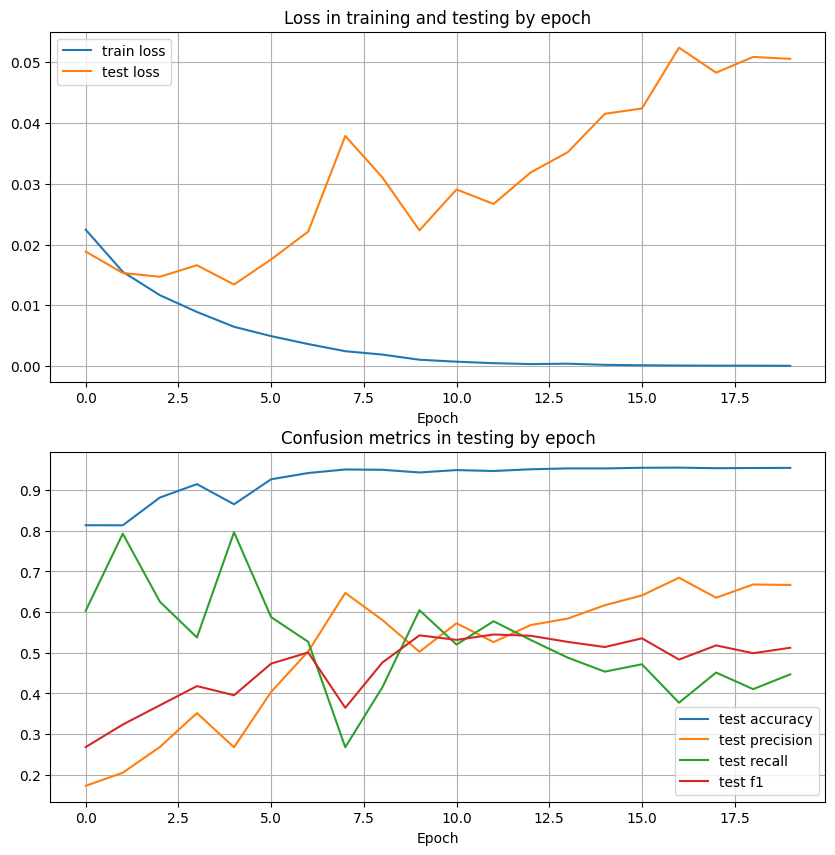

In [5]:

print(f"Training ends {datetime.now().isoformat()}")
for metric in ["accuracy", "precision", "recall", "f1", "mcc"]:
    if len(model_metrics[f"test_{metric}"]) > 0:
        print(f"Test {metric}:", model_metrics[f"test_{metric}"][-1])

plot_model_metrics(model_metrics)

In [6]:
torch.save(model, "model.pickle")